In [3]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), os.pardir)))
import src.TLRec.Experimental_Retrieval as Experimental_Retrieval
import matplotlib.pyplot as plt
import src.TLRec.utils as utils
import os
import numpy as np

## Select the object and reference images

First it is necessary to upload the stack of recorded images to retrieve the differential phase contrast images. You can put the images into the **Data** folder or you can write the path where they are located

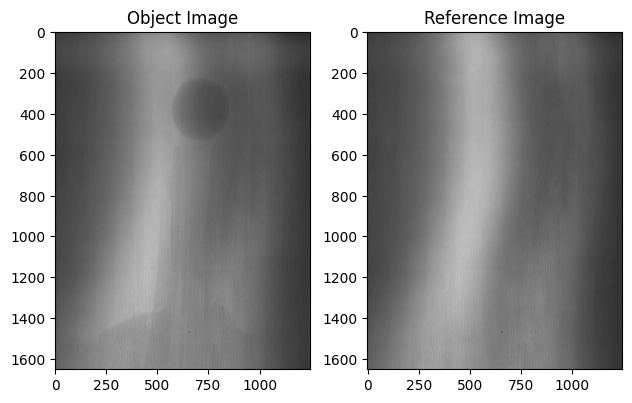

In [4]:
# If they are inside Data folder

object_images_filename = 'Objeto_corr_tiff' #Without .tif
reference_images_filename = 'FF_corr_tiff' #Without .tif
#object_images_filename = 'object' #Without .tif
#reference_images_filename = 'ref' #Without .tif

# If they are in a different path
#object_images_path = r'C:\Users\example\Object_Images' #Without .tif
#reference_images_path = r'C:\Users\example\Reference_Images' #Without .tif
#images = utils.read_Tiff_file(object_images_path)
#images_reference = utils.read_Tiff_file(reference_images_path)

images = utils.read_Tiff_file(object_images_filename)
images_reference = utils.read_Tiff_file(reference_images_filename) 

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
ax[0].imshow(images[0,:,:],  'gray')
ax[0].title.set_text('Object Image')

ax[1].imshow(images_reference[0,:,:],  'gray')
ax[1].title.set_text('Reference Image')

plt.show()

You can check the modulation curve for a single pixel.

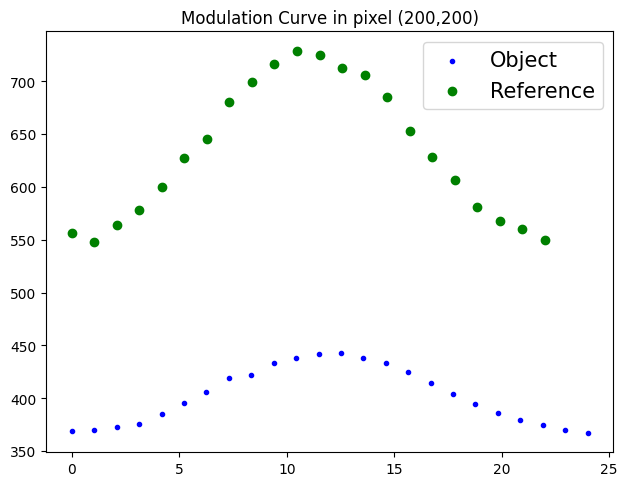

In [5]:
fig, ax = plt.subplots(1, 1)
fig.tight_layout()
pixel = [200, 200]
x_obj = np.linspace(0,images.shape[0], num =images.shape[0],  endpoint = True) 
x_ref = np.linspace(0,images_reference.shape[0], num =images_reference.shape[0], endpoint = True)
ax.scatter(x_obj, images[:,pixel[0],pixel[1]],color= "blue",marker= ".", label = 'Object')
ax.scatter(x_ref, images_reference[:,pixel[0],pixel[1]],color= "green",marker= "o", label ='Reference')
ax.legend(prop=dict(size=15))
ax.title.set_text(f'Modulation Curve in pixel ({pixel[0]},{pixel[1]})')

Knowing the periodicity of the Grating G2, it is better to see the x label between 0 and $2\pi$. In this example, the periodicity of G2 is 6 $\mu m$.

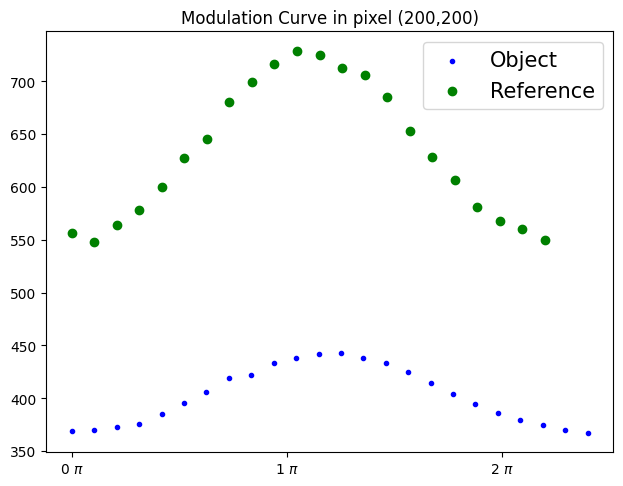

In [6]:
import matplotlib.ticker as tck

G2_Period = 6
Phase_step = 0.3
pixel = [200, 200]

fig, ax = plt.subplots(1, 1)
fig.tight_layout()
x_obj = np.linspace(0,images.shape[0],num= images.shape[0], endpoint = True)*2*np.pi/G2_Period*Phase_step
x_ref = np.linspace(0,images_reference.shape[0],num= images_reference.shape[0], endpoint = True)*2*np.pi/G2_Period*Phase_step
ax.scatter(x_obj/np.pi, images[:,pixel[0],pixel[1]],color= "blue",marker= ".", label = 'Object')
ax.scatter(x_ref/np.pi, images_reference[:,pixel[0],pixel[1]],color= "green",marker= "o", label ='Reference')
ax.legend(prop=dict(size=15))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.title.set_text(f'Modulation Curve in pixel ({pixel[0]},{pixel[1]})')

Once the images are all upload, we can perform the fit of the modulation curve using different algorithms. In the next cell you can check how the fit is done for a single pixel using all retrieval functions developed in this repository.

1
1


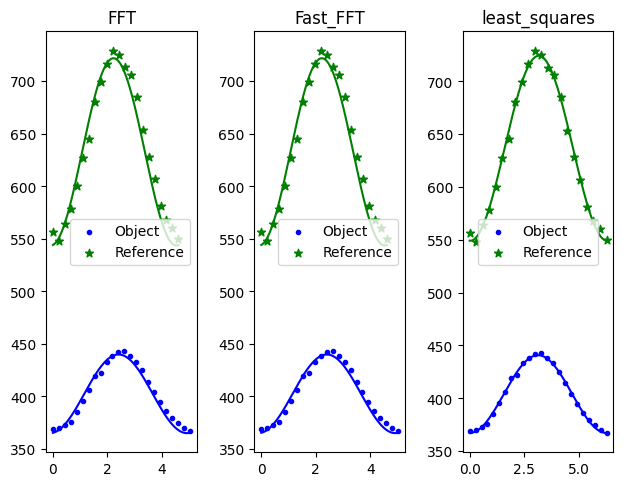

In [7]:
import matplotlib.pyplot as plt
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), os.pardir)))
import src.TLRec.Image_Display as id

G2_Period = 6
Phase_step = 0.2
pixel = [200, 200]

fig, ax = plt.subplots(1, 3)
fig.tight_layout()
rec_types = ['FFT', 'Fast_FFT', 'least_squares']
i = 0
j = 0
for type in rec_types:
    x_obj, y_obj, x_obj_fit, y_obj_fit = id.Pixel_intensity(images, G2_Period, Phase_step, pixel[0], pixel[1], type)
    ax[i].scatter(x_obj, y_obj,color= "blue",marker= ".", label = 'Object')
    ax[i].plot(x_obj_fit, y_obj_fit,color= "blue")

    x_ref, y_ref, x_ref_fit, y_ref_fit = id.Pixel_intensity(images_reference, G2_Period, Phase_step, pixel[0], pixel[1], type)
    ax[i].scatter(x_ref, y_ref,color= "green",marker= "*", label = 'Reference')
    ax[i].plot(x_ref_fit, y_ref_fit,color= "green")
    ax[i].title.set_text(f'{type}')
    ax[i].legend(prop=dict(size=10))
    
    i += 1
    if i == 3:
        j +=1
        i = 0
        


Retrieve the DPC, Atenuation and Dark Field Images from the recorded images using the phase stepping method.

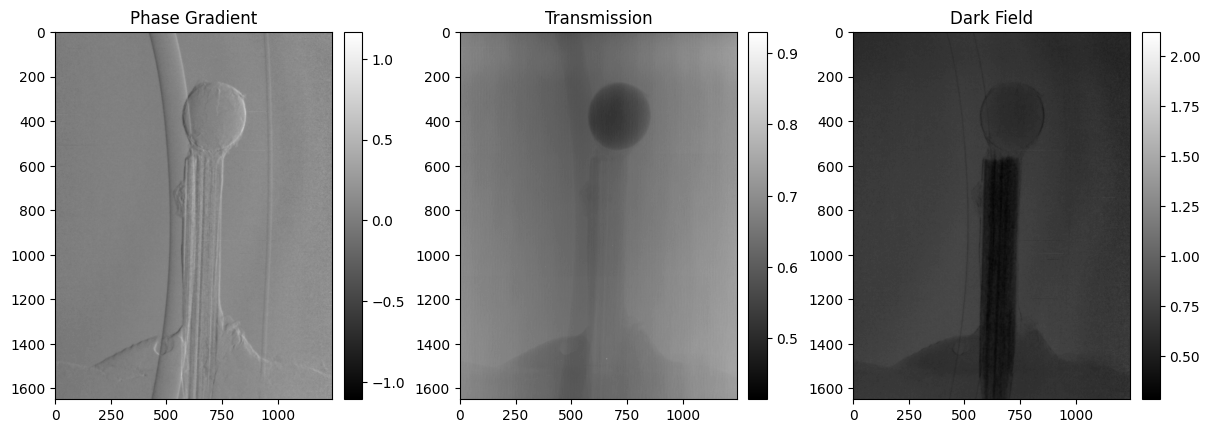

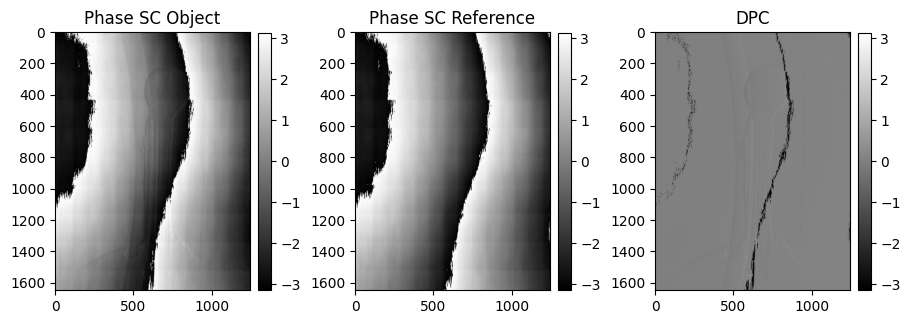

In [ ]:
rec_type = 'Fast_FFT' # 'FFT', 'Fast_FFT', 'least_squares',  'Step_correction', 'Dose_correction', 'Improve_least_squares',
G2_Period = 6
DSO = 25 #cm
DOD = 25 #cm
DG1_Object = 0 #cm
Design_energy = 35 #keV
pixel_size = 1

Diff_Phase, transmission, Dark_Field, Phase,  SC_Phase_reference, SC_Phase_object = Experimental_Retrieval.Modulation_Curve_Reconstruction(images, images_reference,                                                                                                           
    G2_Period,DSO, DOD, DG1_Object, Design_energy, pixel_size, type=rec_type, unwrap_phase = False)
'''
The Diff_Phase information is \Delta \Phi = \phi_{obj} - \phi_{ref}

The difference between Absorption and Transmission images is the following:
Absorption = -ln(I/I0)
Transmision = I/I0

The Dark Field Image contains the following information:
DF = V/V_{ref}
Some references calculate -ln(V/V_{ref}) or 1-V/V_{ref}
'''

#plt.imshow(Diff_Phase, 'gray')
#plt.savefig('DPC.tiff')
#plt.show()
fig, ax = plt.subplots(1, 3, constrained_layout = True, figsize=(12,20))


DPC=ax[0].imshow(Diff_Phase, cmap = 'gray')
ax[0].set_title('Phase Gradient')
fig.colorbar(DPC, ax = ax[0], fraction=0.066, pad=0.04)

Tr = ax[1].imshow(transmission, cmap ='gray')
ax[1].set_title('Transmission')
fig.colorbar(Tr, ax = ax[1], fraction=0.066, pad=0.04)

DF = ax[2].imshow(Dark_Field,cmap = 'gray')
ax[2].set_title('Dark Field')
fig.colorbar(DF, ax = ax[2], fraction=0.066, pad=0.04)
plt.savefig('Results/Rec.jpg', dpi=500)
plt.show()

fig, ax = plt.subplots(1, 3, constrained_layout = True, figsize=(9,9))

SC_Obj=ax[0].imshow(SC_Phase_object, cmap = 'gray')
ax[0].set_title('Phase SC Object')
fig.colorbar(SC_Obj, ax = ax[0], fraction=0.066, pad=0.04)

SC_Ref = ax[1].imshow(SC_Phase_reference, cmap ='gray')
ax[1].set_title('Phase SC Reference')
fig.colorbar(SC_Ref, ax = ax[1], fraction=0.066, pad=0.04)

PG_unwrapped = ax[2].imshow(SC_Phase_object-SC_Phase_reference, cmap = 'gray')
ax[2].set_title('DPC')
fig.colorbar(SC_Ref, ax = ax[2], fraction=0.066, pad=0.04)
fig
plt.show()


There are two ways to obtain the integrated Phase, the simplest one is just integrate the Differential Phase Contrast Image. However, due to noise some artifacts appear in form of horizontal fringes. The other way is using a Wiener Filter to reduce the noise contribution to the formation of the image. Here you can see the differences between both algorithms.

-0.3408500059374793 2.609927232051517


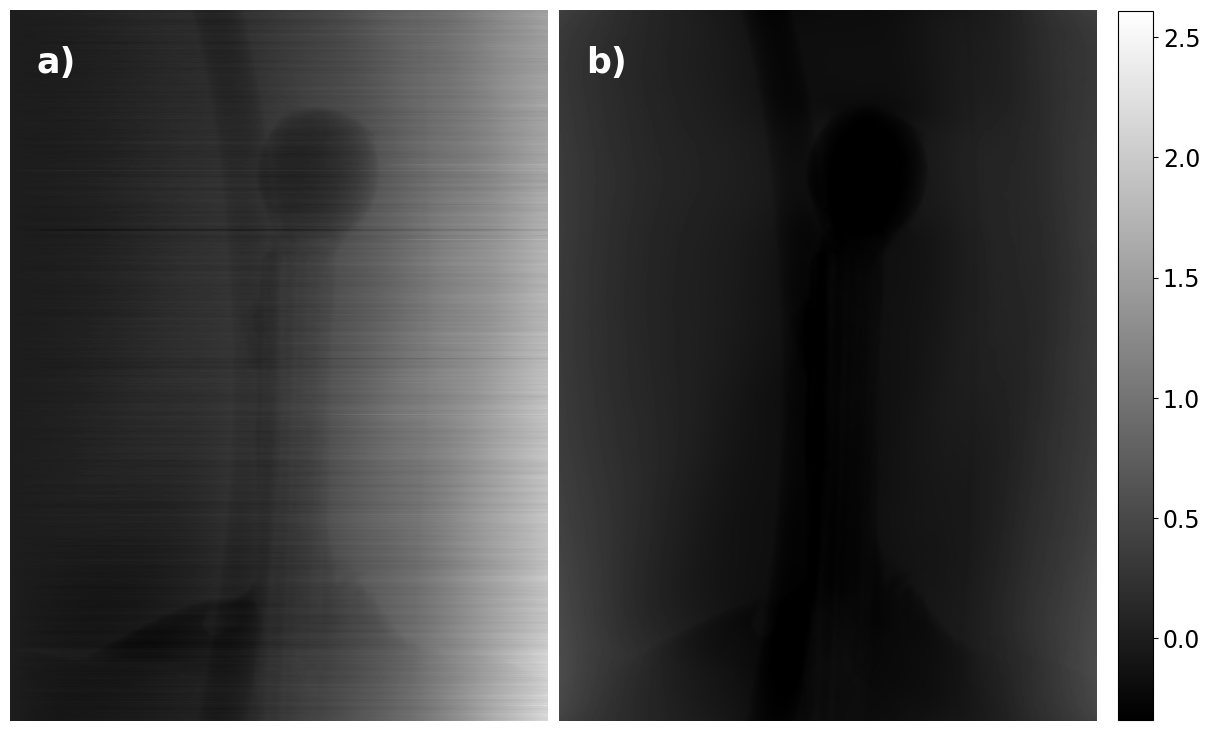

In [13]:
pixel_size = 0.02 #um 
v0 = 0.004 # um^-1
n = 1
s = 3e7
Phase_integrated = utils.numerical_integration(Diff_Phase, pixel_size)

print(np.min(Phase_integrated), np.max(Phase_integrated))

Phase_wiener = utils.Apply_Phase_Wiener_filter(Diff_Phase, pixel_size, pixel_size, v0, n, s)

title_SIZE = 22
axes_SIZE = 18
legend_SIZE = 16
ticks_SIZE = 17


plt.rc('axes', titlesize=axes_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=axes_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=ticks_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=ticks_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=legend_SIZE)    # legend fontsize
plt.rc('figure', titlesize=title_SIZE)

fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize=(12,12))


P_integrated=ax[0].imshow(Phase_integrated,vmin=-0.34, vmax=2.61, cmap = 'gray')
#ax[0].set_title('Phase Integrated')
ax[0].axis('off')
ax[0].text(0.05, 0.95, 'a)', transform=ax[0].transAxes, fontsize=25, fontweight='bold', va='top', color = 'white')
#fig.colorbar(P_integrated, ax = ax[0], fraction=0.066, pad=0.04)

P_Wiener = ax[1].imshow(Phase_wiener, vmin=-0.34, vmax=2.61,cmap ='gray')
ax[1].text(0.05, 0.95, 'b)', transform=ax[1].transAxes, fontsize=25, fontweight='bold', va='top', color = 'white')
#ax[1].set_title('Phase Wiener Filter')
ax[1].axis('off')
fig.colorbar(P_integrated, ax = ax[1], fraction=0.066, pad=0.04)

plt.savefig('Results/Phase_int.pdf', dpi=300, bbox_inches = 'tight')
plt.show()




# **Save the Results**

In [10]:
from PIL import Image

filenames = ['PG', 'Tr', 'Phase', 'Phase_wiener', 'DF']
data = [Diff_Phase, transmission, Phase_integrated, Phase_wiener, Dark_Field]

for array, filename in zip(data, filenames):
    im = Image.fromarray(array)
    im.save('Results/'+filename+'.tif')